# Housing Values in Suburbs of Boston
The medv variable is the target variable.

## Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per $10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in $1000s.

In [0]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# 데이터 불러오기
df = pd.read_csv('BostonHousing.csv')

In [3]:
# 데이터 관찰
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# 데이터 형태
df.shape

(506, 14)

In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
b          506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [6]:
# 컬럼 확인
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [7]:
# 요약 통계
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


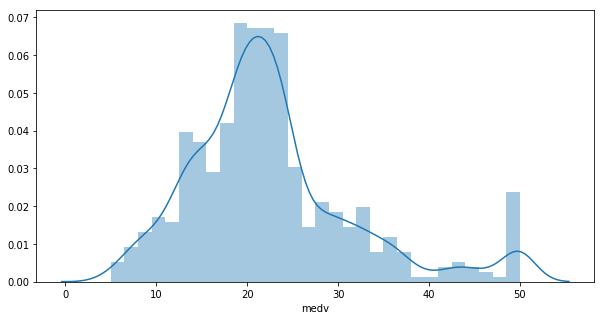

In [8]:
plt.figure(figsize=(10, 5))

sns.distplot(df['medv'], bins=30)

In [9]:
# 변수들간,상관 관계
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


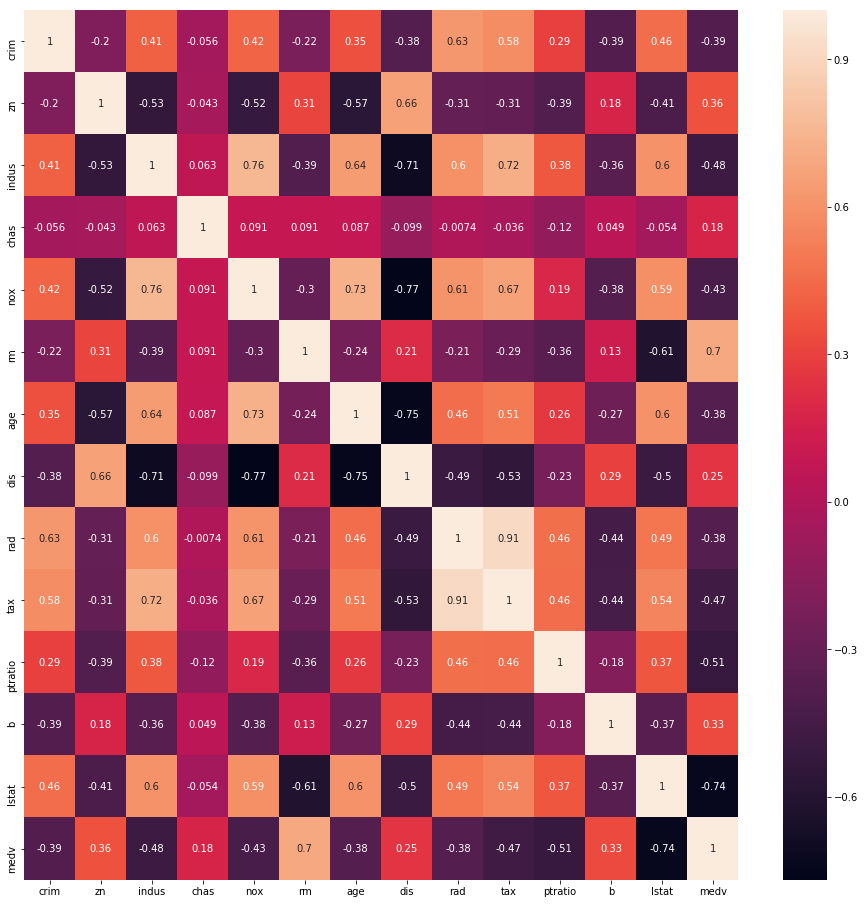

In [10]:
plt.figure(figsize=(16, 16))
sns.heatmap(data=df.corr(), annot=True)

In [0]:
# 데이터와 라벨(타겟)으로 나누기
data = df.drop('medv', axis=1)
label = df['medv']

In [12]:
print(data.shape)
print(label.shape)

(506, 13)
(506,)


In [15]:
# 학습용과 평가용으로 데이터 나누기
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [16]:
# 모델 불러와서 모델 객체 만들기(모델 선택)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# 학습용 데이터로 학습시키기
model.fit(x_train, y_train)  #트레인용 정답

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
# 모델 평가하기
# 평가용 데이터(x_test) 넣어서 예측값 구하기 
y_pred = model.predict(x_test)
# 평가 지표로 평가하기
from sklearn import metrics  # matrics는 평가지표 
print('MAE', metrics.mean_absolute_error(y_test, y_pred)) #절댓값오차의 평균
print('MSE', metrics.mean_squared_error(y_test, y_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

#정확도
print('Score', model.score(x_test, y_test))  #73% 높을수록좋음..이 훈련데이터들을 가지고 학습을해서 예측을 했는데 그 정확도가 73%다. 73%로 예측을 하였따...

MAE 3.213270495842365
MSE 20.869292183770575
RMSE 4.568292042303182
Score 0.7334492147453107


 훈련 데이터(X_train)와 훈련 데이터의 레이블(y_train)을 매개변수로 하여 fit 메서드를 호출해 모델을 만들었습니다. 그런 다음 모델의 정확도를 계산하는 score 메서드로 모델을 평가했습니다. 테스트 데이터와 테스트 데이터의 레이블을 score 메서드에 넣어 97% 정확도를 얻었습니다. 이는 테스트 세트에 있는 샘플의 97%를 정확히 맞혔다는 뜻입니다.

이 결과는 새로운 데이터(여기서는 새 붓꽃의 측정값)에 이 모델을 적용해도 좋다는 확신을 주며, 대략 97% 확률로 이 모델을 신뢰할 수 있습니다.